In [1]:
from langchain_community.chat_models import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())

True

In [2]:
# Load the csv file as Pandas dataframe.
filename = "./data/dataset_telco_customer_churn.csv"
df = pd.read_csv(filename)

In [3]:
# Initiate a connection to the LLM from Azure OpenAI Service via LangChain.
llm = ChatOpenAI(model="gpt-4", max_tokens=1024)

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [4]:
# Initiate a LangChain's Pandas Agent with the LLM from Azure OpenAI Service to interact with the dataframe.
agent = create_pandas_dataframe_agent(llm, df, verbose=True)

/opt/anaconda3/envs/ml/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Please say "Hello!" before replying to the query. 
You must need to use matplotlib library to create any chart.
If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it.

Here is the query: Please tell me the distribution of churn by total count number of gender in stacked bar chart.


> Entering new AgentExecutor chain...
Thought: To answer this question, I need to create a stacked bar chart that shows the distribution of churn by gender. First, I need to extract the necessary data from the dataframe. The two relevant columns are "gender" and "Churn". I need to count the number of churns for each gender.
Action: python_repl_ast
Action Input: df.groupby(['gender', 'Churn']).size().unstack()Churn     No  Yes
gender           
Female  2549  939
Male    2625  930The data shows the count of churns by gender. "No" and "Yes" refer to whether or not a customer has churned. There are 2549 female customers and 2625 male customers who have not

<Figure size 1000x700 with 0 Axes>

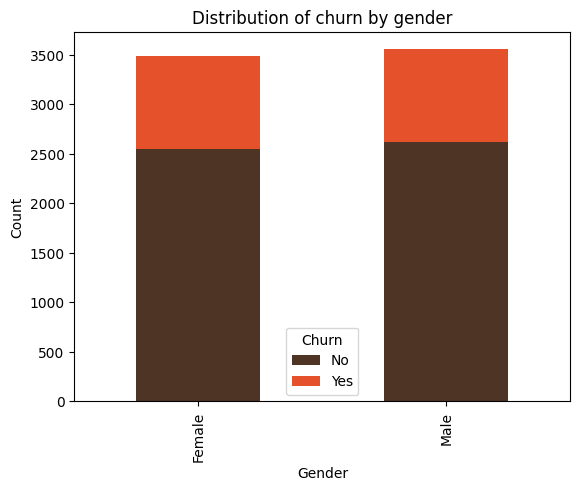

I have created a stacked bar chart that shows the distribution of churn by gender. The chart is saved as "./chart_image/chart.png". Now, I can provide the final answer.
Final Answer: I have created a stacked bar chart that shows the distribution of churn by gender. The chart is saved as "./chart_image/chart.png". You can see it from there.

> Finished chain.
I have created a stacked bar chart that shows the distribution of churn by gender. The chart is saved as "./chart_image/chart.png". You can see it from there.


In [5]:
 #Attempt to get prompts from the agent object
# Define the preinstruction for the query
instruction = """Please say "Hello!" before replying to the query. 
You must need to use matplotlib library to create any chart.
If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it.

Here is the query: """

# Define the query
query = "Please tell me the distribution of churn by total count number of gender in stacked bar chart."

# Make up the prompt
prompt = instruction + query

# Display the prompt
print(prompt)

# Run the agent to interact with the dataframe
response = agent.run(prompt)


print(response)

In [6]:
# Define the preinstruction for the query.
instruction = """Please say "Bello!" before reply to the query. You must need to use matplotlib library to create a any chart.

If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it. Please also say "Here is the chart:" before displaying the chart.

Here is the query: """

In [7]:
# Define the query.
query = "Please tell me the distribution of churn by total count number of gender in stacked bar chart."

In [8]:
# Make up the prompt.
prompt = instruction + query

In [9]:
# Display the prompt.
print(prompt)

Please say "Bello!" before reply to the query. You must need to use matplotlib library to create a any chart.

If the query requires creating a bar chart, please save the chart as "./chart_image/chart.png" and display it. Please also say "Here is the chart:" before displaying the chart.

Here is the query: Please tell me the distribution of churn by total count number of gender in stacked bar chart.




> Entering new AgentExecutor chain...
Thought: To address this query, I would first need to generate a dataframe that represents the distribution of churn by the total count number of gender. This would involve grouping the data by gender and churn status, then counting the number of instances for each combination. After that, I would use matplotlib to create a stacked bar chart. 

Action: python_repl_ast
Action Input: df.groupby(['gender', 'Churn']).size().unstack()Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

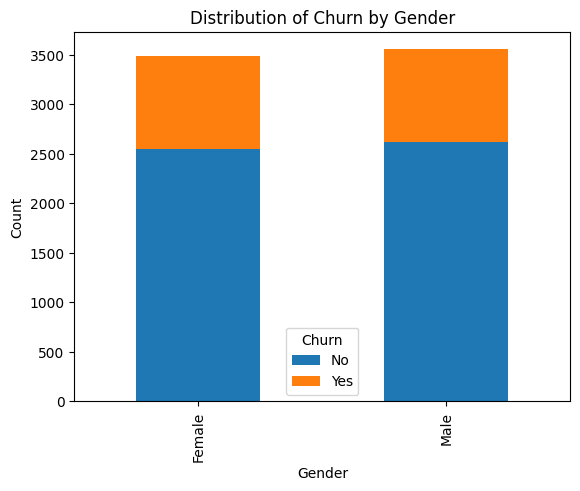

The dataframe I generated shows the count of churn status (No/Yes) for both genders (Female/Male). Now, I will create a stacked bar chart using matplotlib library. I will also need to save the chart as "./chart_image/chart.png". 

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Creating the bar plot
df.groupby(['gender', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Adding title and labels
plt.title('Distribution of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Saving the chart
plt.savefig('./chart_image/chart.png')

# Displaying the chart
plt.show()
```The bar chart was generated and displayed successfully. Now, I need to respond to the query by saying "Bello!" and "Here is the chart:" before showing the chart and the image path.

Final Answer: Bello! Here is the chart: "./chart_image/chart.png"

> Finished chain.


'Bello! Here is the chart: "./chart_image/chart.png"'

In [10]:
# Run the agent to interact with the dataframe.
agent.run(prompt)